In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam


In [2]:
# Load your CSV
df = pd.read_csv('Apple Dataset.csv')

In [3]:
# Clean and preprocess
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.sort_values('Date')
df = df[['Date', 'Close']].dropna()

# Create target variable
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Scale features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Close', 'Target']])
X = scaled[:, 0].reshape(-1, 1)
y = scaled[:, 1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [4]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [9]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input for LSTM
X_lstm = X.reshape(-1, 1, 1)
X_train_lstm, X_test_lstm = X_lstm[:len(X_train)], X_lstm[len(X_train):]

# Define LSTM model with modern input style
lstm_model = Sequential([
    Input(shape=(1, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=20, verbose=0)

# Predict
lstm_pred = lstm_model.predict(X_test_lstm).flatten()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [10]:
def inverse_transform(x, y_scaled):
    return scaler.inverse_transform(np.concatenate([x, y_scaled.reshape(-1, 1)], axis=1))[:, 1]

actual_prices = inverse_transform(X_test, y_test)
lr_prices = inverse_transform(X_test, lr_pred)
rf_prices = inverse_transform(X_test, rf_pred)
lstm_prices = inverse_transform(X_test, lstm_pred)


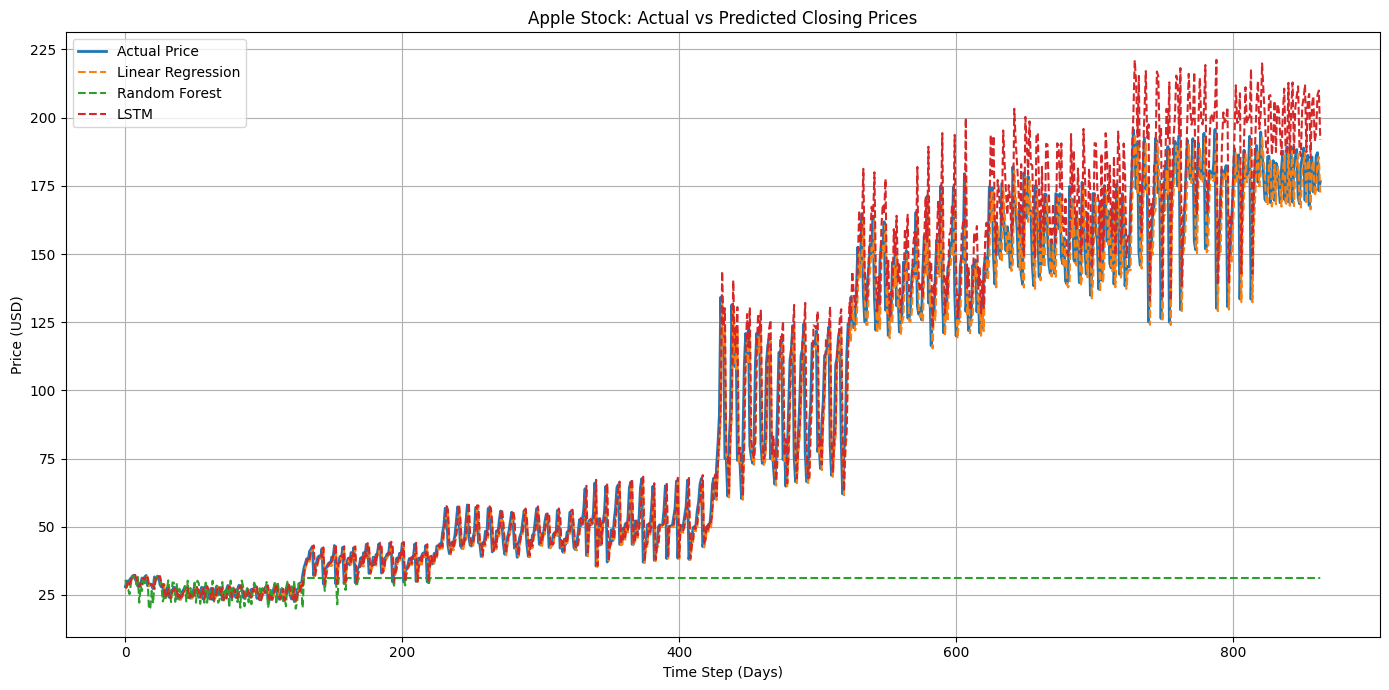

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Price', linewidth=2)
plt.plot(lr_prices, label='Linear Regression', linestyle='--')
plt.plot(rf_prices, label='Random Forest', linestyle='--')
plt.plot(lstm_prices, label='LSTM', linestyle='--')
plt.title('Apple Stock: Actual vs Predicted Closing Prices')
plt.xlabel('Time Step (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
